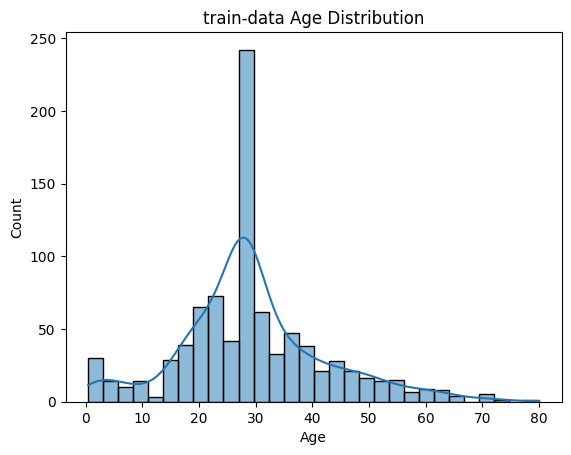

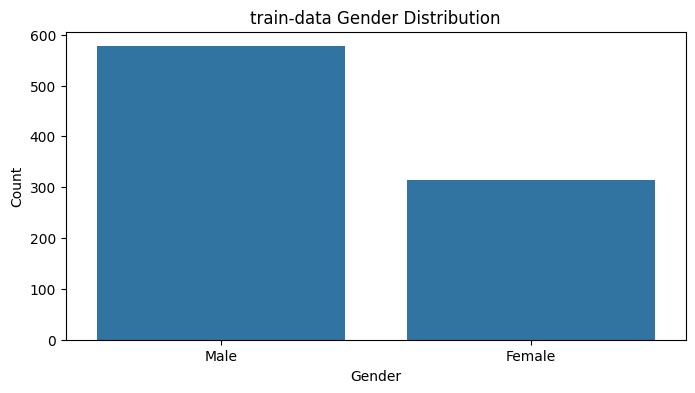

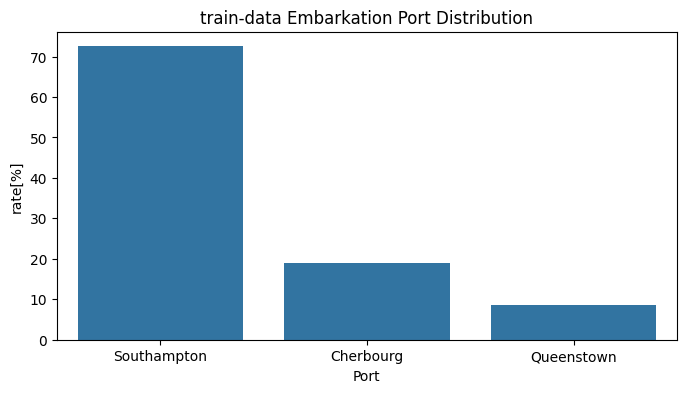

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# データのロード
file_path = './train.csv'  
data = pd.read_csv(file_path)

# 'Age'の欠損値を中央値で埋める
data['Age'] = data['Age'].fillna(data['Age'].median())

# カテゴリカルデータのエンコーディング
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')  # 最頻値で埋める（修正版）
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Seabornを使った視覚化例
sns.histplot(data['Age'], kde=True)
plt.title('train-data Age Distribution')
plt.show()

# 男女の数をカウント
gender_counts = data['Sex'].value_counts()

# 乗船した港の割合を計算
embarked_counts = data['Embarked'].value_counts(normalize=True) * 100

# 男女の数のグラフを作成
plt.figure(figsize=(8, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('train-data Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

# 乗船した港の割合のグラフを作成
plt.figure(figsize=(8, 4))
sns.barplot(x=embarked_counts.index, y=embarked_counts.values)
plt.title('train-data Embarkation Port Distribution')
plt.xlabel('Port')
plt.ylabel('rate[%]')
plt.xticks(ticks=[0, 1, 2], labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()